# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100) 

# EDA

In [2]:
df= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Distribution of target variable: SalesPrice 

Skewness: 1.882876
Kurtosis: 6.536282


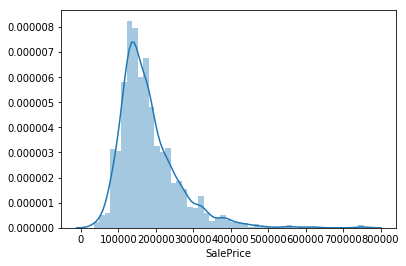

In [6]:
sns.distplot(df['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 0.121347
Kurtosis: 0.809519


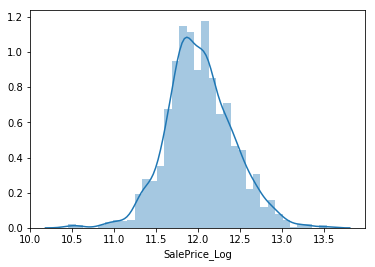

In [7]:
df['SalePrice_Log'] = np.log1p(df['SalePrice'])

sns.distplot(df['SalePrice_Log']);
# skewness and kurtosis
print("Skewness: %f" % df['SalePrice_Log'].skew())
print("Kurtosis: %f" % df['SalePrice_Log'].kurt())
# dropping old column
df.drop('SalePrice', axis= 1, inplace=True)

# Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Handling missing values

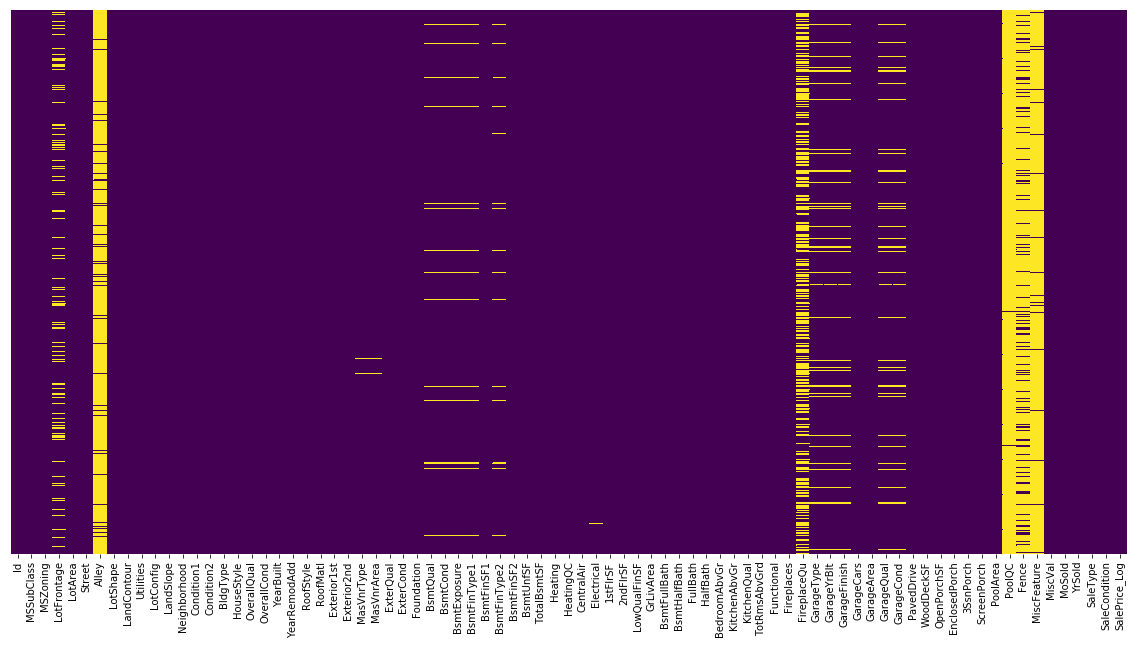

In [9]:
# Check for missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# Count missing values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
# Drop Alley, PoolQC, Fence, MiscFeature
df.drop(columns=['Alley','PoolQC', 'Fence','MiscFeature'],axis=1, inplace=True)

In [12]:
# Replace NaN values of FireplaceQu with 'No'
df.FireplaceQu = df.FireplaceQu.fillna('No')

In [13]:
# Replace isNull values of LotFrontage with median
from sklearn.preprocessing import Imputer

In [14]:
imr = Imputer(missing_values='NaN',strategy='median',axis=0)
imr.fit(df['LotFrontage'].values.reshape(-1, 1))
imputed_data = imr.transform(df['LotFrontage'].values.reshape(-1, 1))
df['LotFrontage'] = imputed_data

In [15]:
# Replace null values of MasVnrType with most frequent --> 'None'
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [16]:
df.MasVnrType = df.MasVnrType.fillna('None')

In [17]:
# Replace null values of MasVnrArea with median
imr = Imputer(missing_values='NaN',strategy='median',axis=0)
imr.fit(df['MasVnrArea'].values.reshape(-1, 1))
imputed_data = imr.transform(df['MasVnrArea'].values.reshape(-1, 1))
df['MasVnrArea'] = imputed_data

In [18]:
# Replace null values of BsmtQual, BsmtCond with most frequent --> 'TA'
df.BsmtQual = df.BsmtQual.fillna('TA')
df.BsmtCond = df.BsmtCond.fillna('TA')

In [19]:
# Replace null values of BsmtExposure, BsmtCond with most frequent --> 'TA'
df.BsmtExposure = df.BsmtExposure.fillna('No')

In [20]:
df.BsmtFinType1 = df.BsmtFinType1.fillna('Unf')

In [21]:
# Replace null values of BsmtFinType2 with most frequent --> 'Unf'
df.BsmtFinType2 = df.BsmtFinType2.fillna('Unf')

In [22]:
# Replace null values of Electrical with most frequent --> 'SBrkr'
df.Electrical = df.Electrical.fillna('SBrkr')

In [23]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [24]:
# Handling missing values of GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

In [25]:
# Replace null values of GarageType with most frequent --> 'Attchd'
df.GarageType = df.GarageType.fillna('Attchd')

In [26]:
# difference between year built and garage year built to see if we can use the YearBuilt for the GarageYrBlt
df['YearBuilt'] - df['GarageYrBlt']

0        0.0
1        0.0
2        0.0
3      -83.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15     -62.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26     -54.0
27      -1.0
28       0.0
29       7.0
        ... 
1430     0.0
1431     0.0
1432    -1.0
1433     0.0
1434     0.0
1435     0.0
1436    -3.0
1437     0.0
1438     0.0
1439     0.0
1440   -71.0
1441     0.0
1442     0.0
1443     0.0
1444     0.0
1445   -24.0
1446     0.0
1447     0.0
1448   -40.0
1449     NaN
1450     NaN
1451     0.0
1452     0.0
1453     NaN
1454     0.0
1455     0.0
1456     0.0
1457     0.0
1458     0.0
1459     0.0
Length: 1460, dtype: float64

In [27]:
# Replace missing values of GarageYrBlt with YearBuilt of that record
df.GarageYrBlt = df.GarageYrBlt.fillna(df.YearBuilt)

In [28]:
# Replace null values of GarageFinish with most frequent --> 'Unf'
df.GarageFinish = df.GarageFinish.fillna('Unf')

In [29]:
# Replace null values of GarageQual with most frequent --> 'TA'
df.GarageQual = df.GarageQual.fillna('TA')

In [30]:
# Replace null values of GarageCond with most frequent --> 'TA'
df.GarageCond = df.GarageCond.fillna('TA')

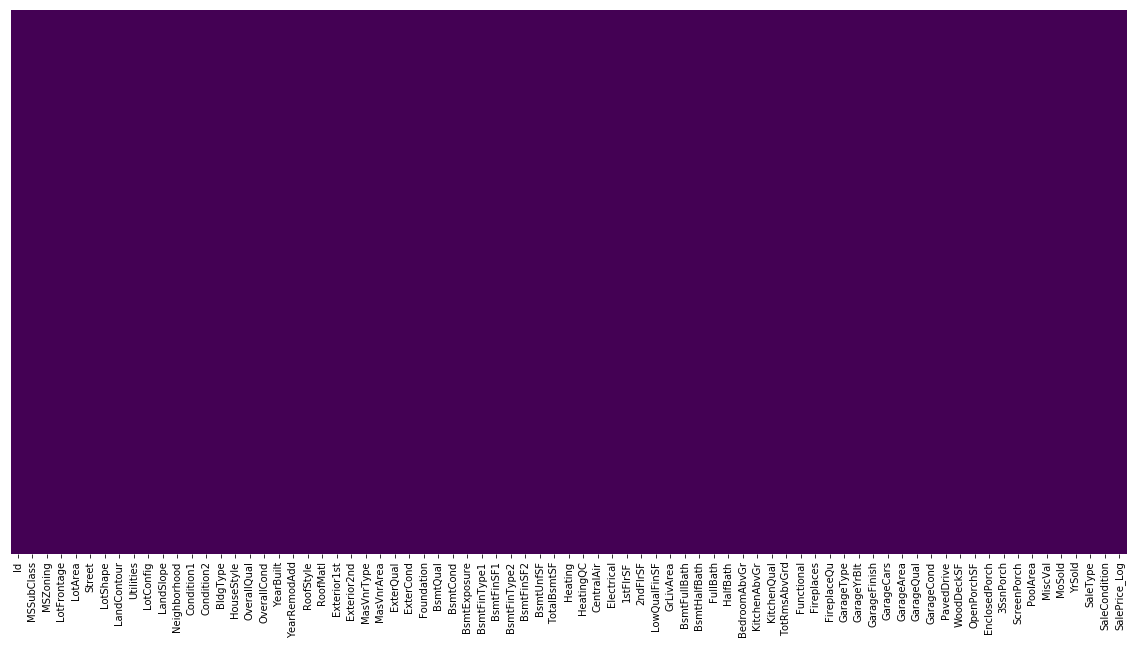

In [31]:
# Check for remaining missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Handling categorical data

In [32]:
# get all categorical columns
df.select_dtypes(include=['object']).head(1)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No,Attchd,RFn,TA,TA,Y,WD,Normal


In [33]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  38
Number of Categorical features:  39


In [34]:
for catg in list(categorical_feats) :
    print(df[catg].value_counts())
    print('-'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------------------------------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
Nr

In [35]:
df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Log
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699


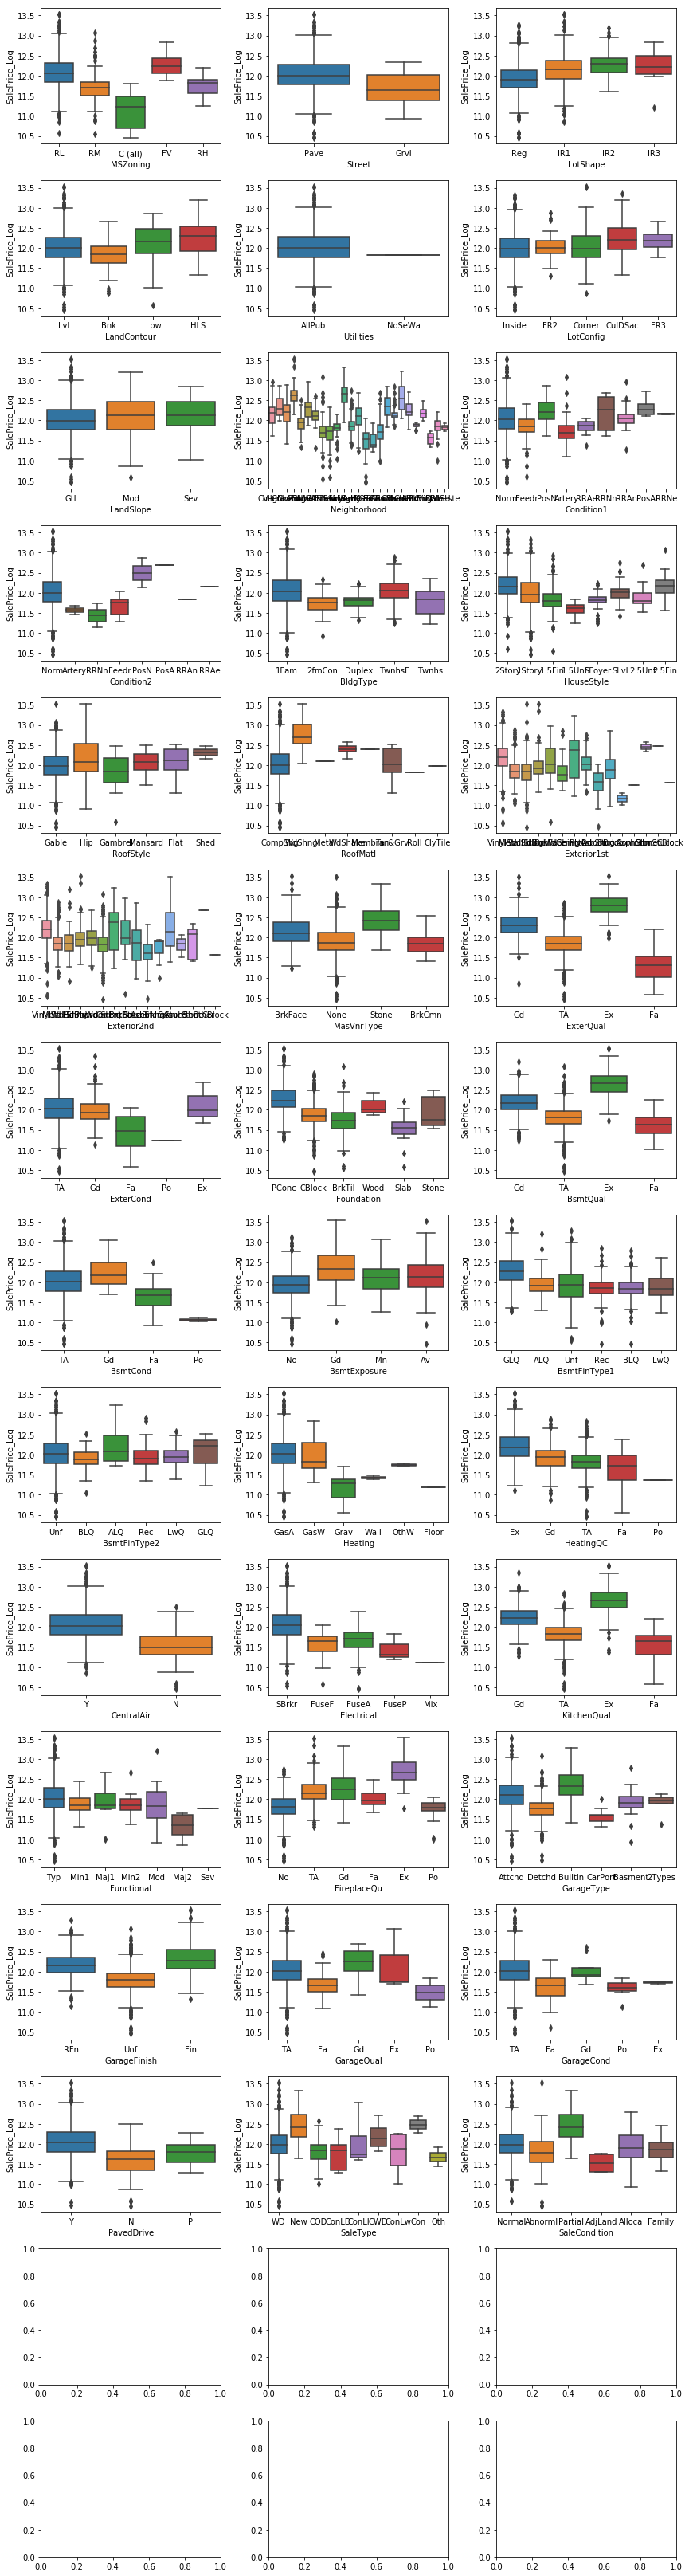

In [36]:
li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=df['SalePrice_Log'], data=df, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

In [37]:
# Categorical features that have a high correlation with target and need to be kept
catg_list = ['MSZoning','Neighborhood','Condition2','MasVnrType','ExterQual','BsmtQual','CentralAir','Electrical','KitchenQual','FireplaceQu','GarageType','SaleCondition']

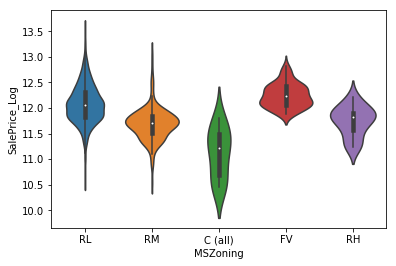

<Figure size 1440x720 with 0 Axes>

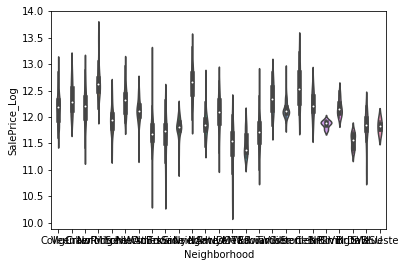

<Figure size 1440x720 with 0 Axes>

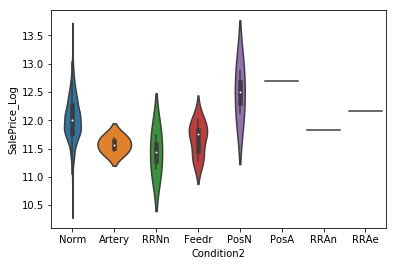

<Figure size 1440x720 with 0 Axes>

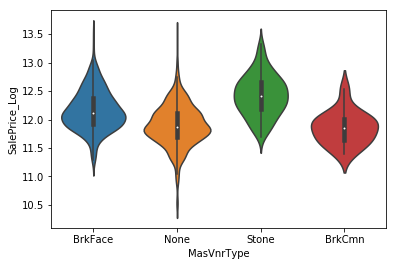

<Figure size 1440x720 with 0 Axes>

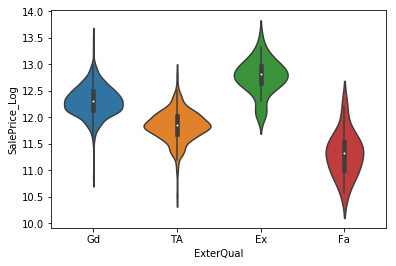

<Figure size 1440x720 with 0 Axes>

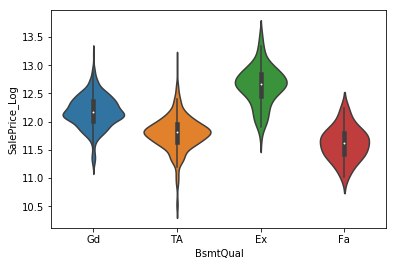

<Figure size 1440x720 with 0 Axes>

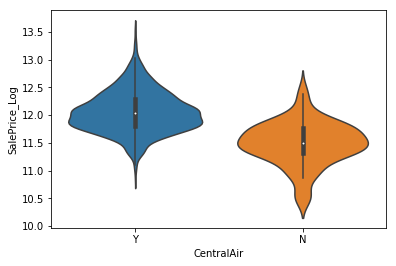

<Figure size 1440x720 with 0 Axes>

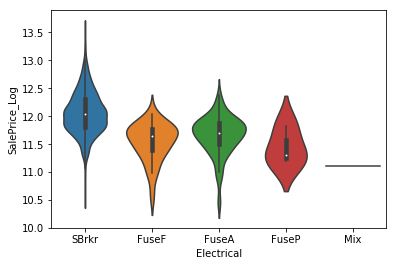

<Figure size 1440x720 with 0 Axes>

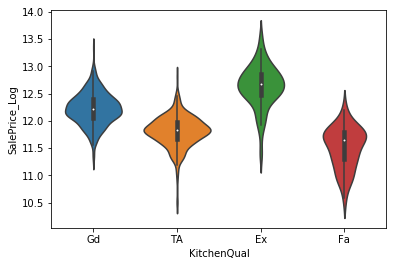

<Figure size 1440x720 with 0 Axes>

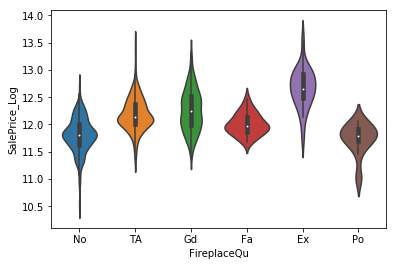

<Figure size 1440x720 with 0 Axes>

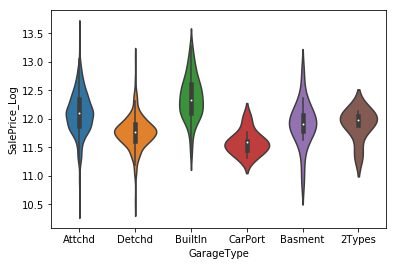

<Figure size 1440x720 with 0 Axes>

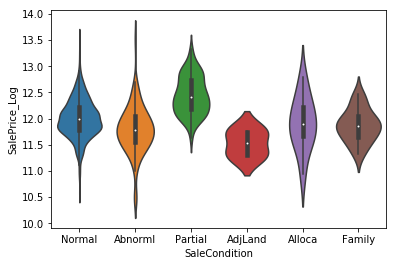

<Figure size 1440x720 with 0 Axes>

In [38]:
for catg in catg_list :
    #sns.catplot(x=catg, y=target, data=df_train, kind='boxen')
    sns.violinplot(x=catg, y=df['SalePrice_Log'], data=df)
    plt.figure(figsize=(20,10))
    plt.show()

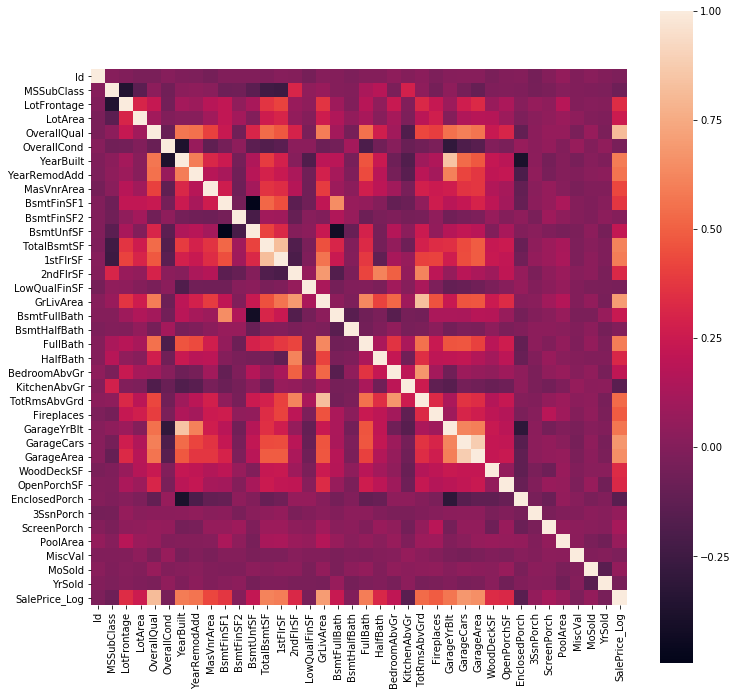

In [39]:
corr = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)
plt.show()

In [40]:
# target used for correlation 
target = 'SalePrice_Log'

SalePrice_Log    1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
GarageYrBlt      0.568696
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Name: SalePrice_Log, dtype: float64


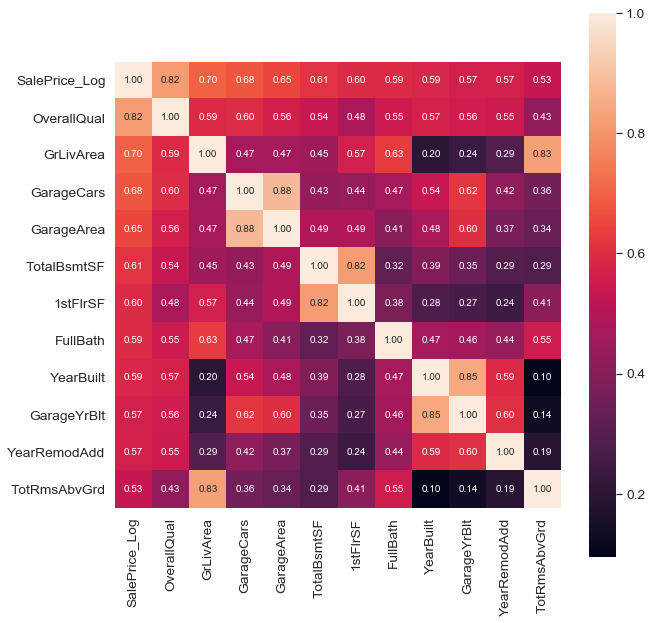

In [41]:
# top ten highest correlated numerical features
nr_feats = 12

corr_abs = corr.abs()
print (corr_abs.nlargest(nr_feats, target)[target])

cols = corr_abs.nlargest(nr_feats, target)[target].index
cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [42]:
todrop = ['2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'Condition1',
 'EnclosedPorch',
 'ExterCond',
 'Exterior1st',
 'Exterior2nd',
 'Fireplaces',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageYrBlt',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'PavedDrive',
 'PoolArea',
 'RoofMatl',
 'RoofStyle',
 'SaleType',
 'ScreenPorch',
 'Street',
 'TotRmsAbvGrd',
 'Utilities',
 'WoodDeckSF',
 'YearRemodAdd',
 'YrSold']

In [43]:
# drop irrelevant features
df.drop(todrop,axis=1,inplace=True)

In [44]:
df.head(10)

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageType,GarageCars,GarageArea,SaleCondition,SalePrice_Log
0,RL,CollgCr,Norm,7,2003,BrkFace,Gd,Gd,856,Y,SBrkr,856,1710,2,Gd,No,Attchd,2,548,Normal,12.247699
1,RL,Veenker,Norm,6,1976,None,TA,Gd,1262,Y,SBrkr,1262,1262,2,TA,TA,Attchd,2,460,Normal,12.109016
2,RL,CollgCr,Norm,7,2001,BrkFace,Gd,Gd,920,Y,SBrkr,920,1786,2,Gd,TA,Attchd,2,608,Normal,12.317171
3,RL,Crawfor,Norm,7,1915,None,TA,TA,756,Y,SBrkr,961,1717,1,Gd,Gd,Detchd,3,642,Abnorml,11.849405
4,RL,NoRidge,Norm,8,2000,BrkFace,Gd,Gd,1145,Y,SBrkr,1145,2198,2,Gd,TA,Attchd,3,836,Normal,12.429220
5,RL,Mitchel,Norm,5,1993,None,TA,Gd,796,Y,SBrkr,796,1362,1,TA,No,Attchd,2,480,Normal,11.870607
6,RL,Somerst,Norm,8,2004,Stone,Gd,Ex,1686,Y,SBrkr,1694,1694,2,Gd,Gd,Attchd,2,636,Normal,12.634606
7,RL,NWAmes,Norm,7,1973,Stone,TA,Gd,1107,Y,SBrkr,1107,2090,2,TA,TA,Attchd,2,484,Normal,12.206078
8,RM,OldTown,Norm,7,1931,None,TA,TA,952,Y,FuseF,1022,1774,2,TA,TA,Detchd,2,468,Abnorml,11.774528
9,RL,BrkSide,Artery,5,1939,None,TA,TA,991,Y,SBrkr,1077,1077,1,TA,TA,Attchd,1,205,Normal,11.678448


### Transform categorical data into numerical: create dummies and map ordinal values 

In [45]:
categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Categorical features:  12


In [46]:
for catg in list(categorical_feats) :
    print(df[catg].value_counts())
    print('-'*50)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
--------------------------------------------------
Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
--------------------------------------------------
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
--------------------------------------------------
TA    906
Gd    488
Ex     52
Fa     

In [47]:
df.head(10)

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageType,GarageCars,GarageArea,SaleCondition,SalePrice_Log
0,RL,CollgCr,Norm,7,2003,BrkFace,Gd,Gd,856,Y,SBrkr,856,1710,2,Gd,No,Attchd,2,548,Normal,12.247699
1,RL,Veenker,Norm,6,1976,None,TA,Gd,1262,Y,SBrkr,1262,1262,2,TA,TA,Attchd,2,460,Normal,12.109016
2,RL,CollgCr,Norm,7,2001,BrkFace,Gd,Gd,920,Y,SBrkr,920,1786,2,Gd,TA,Attchd,2,608,Normal,12.317171
3,RL,Crawfor,Norm,7,1915,None,TA,TA,756,Y,SBrkr,961,1717,1,Gd,Gd,Detchd,3,642,Abnorml,11.849405
4,RL,NoRidge,Norm,8,2000,BrkFace,Gd,Gd,1145,Y,SBrkr,1145,2198,2,Gd,TA,Attchd,3,836,Normal,12.429220
5,RL,Mitchel,Norm,5,1993,None,TA,Gd,796,Y,SBrkr,796,1362,1,TA,No,Attchd,2,480,Normal,11.870607
6,RL,Somerst,Norm,8,2004,Stone,Gd,Ex,1686,Y,SBrkr,1694,1694,2,Gd,Gd,Attchd,2,636,Normal,12.634606
7,RL,NWAmes,Norm,7,1973,Stone,TA,Gd,1107,Y,SBrkr,1107,2090,2,TA,TA,Attchd,2,484,Normal,12.206078
8,RM,OldTown,Norm,7,1931,None,TA,TA,952,Y,FuseF,1022,1774,2,TA,TA,Detchd,2,468,Abnorml,11.774528
9,RL,BrkSide,Artery,5,1939,None,TA,TA,991,Y,SBrkr,1077,1077,1,TA,TA,Attchd,1,205,Normal,11.678448


In [48]:
# Nominal features: MSZoning, Neighborhood, Condition2, MasVnrType, CentralAir, Electrical, GarageType, SaleCondition
# Ordinal features: ExterQual, BsmtQual, KitchenQual, FireplaceQu, 

In [49]:
df.FireplaceQu.value_counts()

No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [50]:
ExterQual_mapping = {'Fa': 1, 'TA': 2, 'Gd': 3,'Ex':4}
df['ExterQual_ord'] = df['ExterQual'].map(ExterQual_mapping)


In [51]:
BsmtQual_mapping = {'Fa': 1, 'TA': 2, 'Gd': 3,'Ex':4}
df['BsmtQual_ord'] = df['BsmtQual'].map(BsmtQual_mapping)

In [52]:
KitchenQual_mapping = {'Fa': 1, 'TA': 2, 'Gd': 3,'Ex':4}
df['KitchenQual_ord'] = df['KitchenQual'].map(KitchenQual_mapping)

In [53]:
FireplaceQu_mapping = {'No': 0, 'Po': 1, 'Fa': 2,'TA':3, 'Gd':4, 'Ex':5}
df['FireplaceQu_ord'] = df['FireplaceQu'].map(FireplaceQu_mapping)

In [54]:
df.head(5)

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,MasVnrType,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,FireplaceQu,GarageType,GarageCars,GarageArea,SaleCondition,SalePrice_Log,ExterQual_ord,BsmtQual_ord,KitchenQual_ord,FireplaceQu_ord
0,RL,CollgCr,Norm,7,2003,BrkFace,Gd,Gd,856,Y,SBrkr,856,1710,2,Gd,No,Attchd,2,548,Normal,12.247699,3,3,3,0
1,RL,Veenker,Norm,6,1976,None,TA,Gd,1262,Y,SBrkr,1262,1262,2,TA,TA,Attchd,2,460,Normal,12.109016,2,3,2,3
2,RL,CollgCr,Norm,7,2001,BrkFace,Gd,Gd,920,Y,SBrkr,920,1786,2,Gd,TA,Attchd,2,608,Normal,12.317171,3,3,3,3
3,RL,Crawfor,Norm,7,1915,None,TA,TA,756,Y,SBrkr,961,1717,1,Gd,Gd,Detchd,3,642,Abnorml,11.849405,2,2,3,4
4,RL,NoRidge,Norm,8,2000,BrkFace,Gd,Gd,1145,Y,SBrkr,1145,2198,2,Gd,TA,Attchd,3,836,Normal,12.429220,3,3,3,3


In [55]:
# Drop original ordinal features
df.drop(['ExterQual','BsmtQual','KitchenQual','FireplaceQu'],axis=1, inplace=True)

In [56]:
df.head(5)

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,MasVnrType,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SaleCondition,SalePrice_Log,ExterQual_ord,BsmtQual_ord,KitchenQual_ord,FireplaceQu_ord
0,RL,CollgCr,Norm,7,2003,BrkFace,856,Y,SBrkr,856,1710,2,Attchd,2,548,Normal,12.247699,3,3,3,0
1,RL,Veenker,Norm,6,1976,None,1262,Y,SBrkr,1262,1262,2,Attchd,2,460,Normal,12.109016,2,3,2,3
2,RL,CollgCr,Norm,7,2001,BrkFace,920,Y,SBrkr,920,1786,2,Attchd,2,608,Normal,12.317171,3,3,3,3
3,RL,Crawfor,Norm,7,1915,None,756,Y,SBrkr,961,1717,1,Detchd,3,642,Abnorml,11.849405,2,2,3,4
4,RL,NoRidge,Norm,8,2000,BrkFace,1145,Y,SBrkr,1145,2198,2,Attchd,3,836,Normal,12.429220,3,3,3,3


In [57]:
# Create dummies
df_dummies = pd.get_dummies(df[['MSZoning','Neighborhood','Condition2','MasVnrType','CentralAir','Electrical','GarageType','SaleCondition']],drop_first=True)

In [58]:
df = pd.merge(df_dummies, df, left_index=True, right_index=True)

In [59]:
df.head(5)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,MasVnrType,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SaleCondition,SalePrice_Log,ExterQual_ord,BsmtQual_ord,KitchenQual_ord,FireplaceQu_ord
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,RL,CollgCr,Norm,7,2003,BrkFace,856,Y,SBrkr,856,1710,2,Attchd,2,548,Normal,12.247699,3,3,3,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,RL,Veenker,Norm,6,1976,None,1262,Y,SBrkr,1262,1262,2,Attchd,2,460,Normal,12.109016,2,3,2,3
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,RL,CollgCr,Norm,7,2001,BrkFace,920,Y,SBrkr,920,1786,2,Attchd,2,608,Normal,12.317171,3,3,3,3
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,RL,Crawfor,Norm,7,1915,None,756,Y,SBrkr,961,1717,1,Detchd,3,642,Abnorml,11.849405,2,2,3,4
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,RL,NoRidge,Norm,8,2000,BrkFace,1145,Y,SBrkr,1145,2198,2,Attchd,3,836,Normal,12.429220,3,3,3,3


In [60]:
df.drop(['MSZoning','Neighborhood','MasVnrType','CentralAir','Electrical','GarageType','SaleCondition','Condition2'],axis=1, inplace=True)

In [61]:
df.head(1)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice_Log,ExterQual_ord,BsmtQual_ord,KitchenQual_ord,FireplaceQu_ord
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,7,2003,856,856,1710,2,2,548,12.247699,3,3,3,0


In [62]:
# Transform YearBuilt to Age --> 2018 - YearBuilt
df['Age'] = 2018 - df['YearBuilt']

In [63]:
df.drop('YearBuilt',axis=1, inplace=True)

In [64]:
df.head(1)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice_Log,ExterQual_ord,BsmtQual_ord,KitchenQual_ord,FireplaceQu_ord,Age
0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,7,856,856,1710,2,2,548,12.247699,3,3,3,0,15


## Standardize features 

In [65]:
# Numerical features to standardize: OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, GarageCars, GarageArea
# Never standardize dummy variables and ordinal values, since these are not normally distributed

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
scaled_features = scaler.fit_transform(df[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea','Age']])
scaled_df = pd.DataFrame(scaled_features, columns=['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea','Age'])

In [68]:
scaled_df.head(5)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,Age
0,0.651479,-0.459303,-0.793434,0.370333,0.789741,0.311725,0.351000,-1.050994
1,-0.071836,0.466465,0.257140,-0.482512,0.789741,0.311725,-0.060731,-0.156734
2,0.651479,-0.313369,-0.627826,0.515013,0.789741,0.311725,0.631726,-0.984752
3,0.651479,-0.687324,-0.521734,0.383659,-1.026041,1.650307,0.790804,1.863632
4,1.374795,0.199680,-0.045611,1.299326,0.789741,1.650307,1.698485,-0.951632


In [69]:
# Merge scaled_df with normal df on index
df_final = pd.merge(scaled_df, df, left_index=True, right_index=True)

In [70]:
df_final.head()

,OverallQual_x,TotalBsmtSF_x,1stFlrSF_x,GrLivArea_x,FullBath_x,GarageCars_x,GarageArea_x,Age_x,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual_y,TotalBsmtSF_y,1stFlrSF_y,GrLivArea_y,FullBath_y,GarageCars_y,GarageArea_y,SalePrice_Log,ExterQual_ord,BsmtQual_ord,KitchenQual_ord,FireplaceQu_ord,Age_y
0,0.651479,-0.459303,-0.793434,0.370333,0.789741,0.311725,0.351000,-1.050994,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,7,856,856,1710,2,2,548,12.247699,3,3,3,0,15
1,-0.071836,0.466465,0.257140,-0.482512,0.789741,0.311725,-0.060731,-0.156734,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,6,1262,1262,1262,2,2,460,12.109016,2,3,2,3,42
2,0.651479,-0.313369,-0.627826,0.515013,0.789741,0.311725,0.631726,-0.984752,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,7,920,920,1786,2,2,608,12.317171,3,3,3,3,17
3,0.651479,-0.687324,-0.521734,0.383659,-1.026041,1.650307,0.790804,1.863632,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,7,756,961,1717,1,3,642,11.849405,2,2,3,4,103
4,1.374795,0.199680,-0.045611,1.299326,0.789741,1.650307,1.698485,-0.951632,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,8,1145,1145,2198,2,3,836,12.429220,3,3,3,3,18


In [71]:
# Drop non-standardized features
columns = ['OverallQual_y', 'TotalBsmtSF_y', '1stFlrSF_y', 'GrLivArea_y', 'FullBath_y', 'GarageCars_y', 'GarageArea_y','Age_y']
df_final.drop(columns, inplace=True, axis=1)

In [72]:
df_final.head()

,OverallQual_x,TotalBsmtSF_x,1stFlrSF_x,GrLivArea_x,FullBath_x,GarageCars_x,GarageArea_x,Age_x,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice_Log,ExterQual_ord,BsmtQual_ord,KitchenQual_ord,FireplaceQu_ord
0,0.651479,-0.459303,-0.793434,0.370333,0.789741,0.311725,0.351000,-1.050994,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,12.247699,3,3,3,0
1,-0.071836,0.466465,0.257140,-0.482512,0.789741,0.311725,-0.060731,-0.156734,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,12.109016,2,3,2,3
2,0.651479,-0.313369,-0.627826,0.515013,0.789741,0.311725,0.631726,-0.984752,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,12.317171,3,3,3,3
3,0.651479,-0.687324,-0.521734,0.383659,-1.026041,1.650307,0.790804,1.863632,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,11.849405,2,2,3,4
4,1.374795,0.199680,-0.045611,1.299326,0.789741,1.650307,1.698485,-0.951632,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,12.429220,3,3,3,3


In [73]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
OverallQual_x            1460 non-null float64
TotalBsmtSF_x            1460 non-null float64
1stFlrSF_x               1460 non-null float64
GrLivArea_x              1460 non-null float64
FullBath_x               1460 non-null float64
GarageCars_x             1460 non-null float64
GarageArea_x             1460 non-null float64
Age_x                    1460 non-null float64
MSZoning_FV              1460 non-null uint8
MSZoning_RH              1460 non-null uint8
MSZoning_RL              1460 non-null uint8
MSZoning_RM              1460 non-null uint8
Neighborhood_Blueste     1460 non-null uint8
Neighborhood_BrDale      1460 non-null uint8
Neighborhood_BrkSide     1460 non-null uint8
Neighborhood_ClearCr     1460 non-null uint8
Neighborhood_CollgCr     1460 non-null uint8
Neighborhood_Crawfor     1460 non-null uint8
Neighborhood_Edwards     1460 non-null uint8
Neighborhood_Gilbert  

# Learning and evaluation

## Split train-test

In [130]:
X = df_final.drop('SalePrice_Log', axis=1)
y = df_final['SalePrice_Log']

In [131]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

Regressor algorithms to test:

1. LinearRegression

2. Ridge

3. DecisionTreeRegressor

4. RandomForestRegressor

5. AdaBoost Regressor 

6. XGBoost

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### 1. Linear Regression 

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
lr = LinearRegression()

In [135]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
lr_predictions = lr.predict(X_test)

In [137]:
# Evaluate model
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error

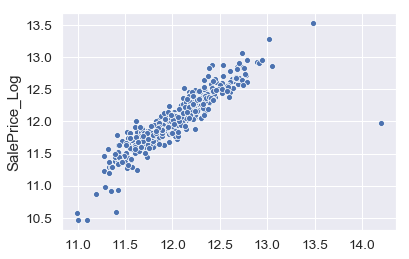

In [138]:
sns.scatterplot(lr_predictions,y_test)

In [139]:
MAE_lr = mean_absolute_error(y_test, lr_predictions)
MSE_lr = mean_squared_error(y_test, lr_predictions)
var_lr = explained_variance_score(y_test, lr_predictions)

In [140]:
print("MAE :" + str(MAE_lr))
print("MSE :" + str(MSE_lr))
print("Explained variance :" + str(var_lr))

MAE :0.10769640995453589
MSE :0.03045475773623839
Explained variance :0.8145949758423464


### 2. Ridge Regression 

In [90]:
from sklearn.linear_model import Ridge

In [91]:
ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv=10, verbose=1, scoring = 'explained_variance')
grid_ridge.fit(X_train, y_train)

print(grid_ridge.best_score_)
print(grid_ridge.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
0.8668154793817198
{'alpha': 1, 'normalize': False, 'tol': 1e-06}


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:    1.4s finished


In [92]:
best_ridge = grid_ridge.best_params_

In [93]:
ridge_optimized = Ridge(alpha= 1, normalize= False, tol=1e-06)

In [412]:
# train ridge regression with optimized hyperparameters

In [94]:
ridge_optimized.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=1e-06)

In [95]:
ridge_pred = ridge_optimized.predict(X_test)

In [96]:
MAE_ridge = mean_absolute_error(y_test, ridge_pred)
MSE_ridge = mean_squared_error(y_test, ridge_pred)
var_ridge = explained_variance_score(y_test, ridge_pred)

In [97]:
print("MAE :" + str(MAE_ridge))
print("MSE :" + str(MSE_ridge))
print("Explained variance :" + str(var_ridge))

MAE :0.10756158561275635
MSE :0.030451714270464954
Explained variance :0.8146259829217126


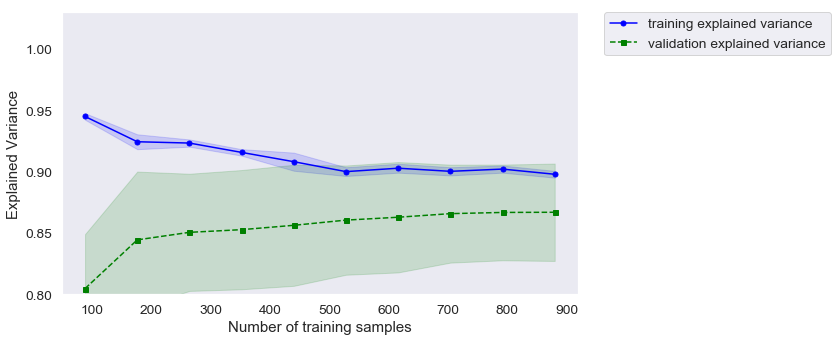

In [250]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=ridge_optimized,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,scoring = 'explained_variance',
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,5))
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training explained variance')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation explained variance')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Explained Variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

### 3. DecisionTree Regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
dtr = DecisionTreeRegressor()

In [100]:
parameters = {'max_depth': list(range(1,100))}

In [101]:
grid_dtr = GridSearchCV(dtr, parameters, cv=10, verbose=1, scoring = 'explained_variance')
grid_dtr.fit(X_train, y_train)

print(grid_dtr.best_score_)
print(grid_dtr.best_params_)

Fitting 10 folds for each of 99 candidates, totalling 990 fits
0.7487058257378981
{'max_depth': 5}


[Parallel(n_jobs=1)]: Done 990 out of 990 | elapsed:    8.3s finished


In [102]:
best_dtr = grid_dtr.best_params_

In [103]:
dtr_optimized = DecisionTreeRegressor(max_depth=5)

In [ ]:
# train decision tree regressor with optimized hyperparameters

In [104]:
dtr_optimized.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [105]:
dtr_pred = dtr_optimized.predict(X_test)

In [106]:
MAE_dtr = mean_absolute_error(y_test, dtr_pred)
MSE_dtr = mean_squared_error(y_test, dtr_pred)
var_dtr = explained_variance_score(y_test, dtr_pred)

In [107]:
print("MAE :" + str(MAE_dtr))
print("MSE :" + str(MSE_dtr))
print("Explained variance :" + str(var_dtr))

MAE :0.14326469122165014
MSE :0.04035345771541747
Explained variance :0.7543304883479754


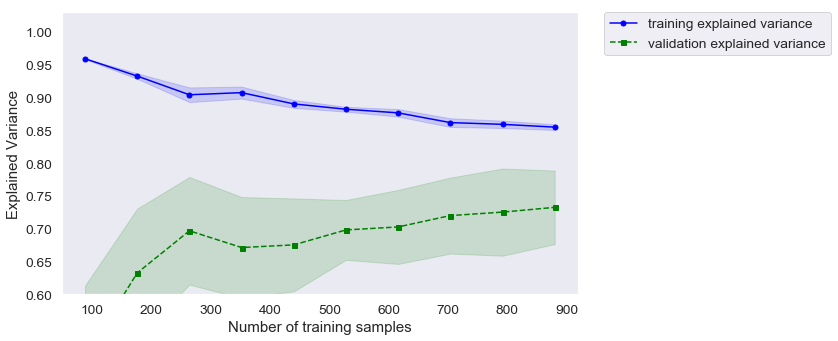

In [251]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=dtr_optimized,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,scoring = 'explained_variance',
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,5))
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training explained variance')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation explained variance')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Explained Variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.6, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

### 4. Random Forest Regressor 

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
# Random Hyperparameter Grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [110]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [112]:
print(rf_random.best_score_)
print(rf_random.best_params_)

0.8575548638132704
{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}


In [203]:
rf_optimized = RandomForestRegressor(n_estimators=1400,min_samples_split=5, min_samples_leaf=1, max_features='sqrt',max_depth=80,bootstrap=False)

In [204]:
rf_optimized.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [205]:
rf_pred = rf_optimized.predict(X_test)

In [206]:
MAE_rf = mean_absolute_error(y_test, rf_pred)
MSE_rf = mean_squared_error(y_test, rf_pred)
var_rf = explained_variance_score(y_test, rf_pred)

In [207]:
print("MAE :" + str(MAE_rf))
print("MSE :" + str(MSE_rf))
print("Explained variance :" + str(var_rf))

MAE :0.10728777051411559
MSE :0.024836219763817412
Explained variance :0.8494709556935004


#### Learning curve for Random Forest Regressor

In [113]:
from sklearn.model_selection import learning_curve

In [117]:
rf_optimized = RandomForestRegressor(n_estimators=1400,min_samples_split=5,min_samples_leaf=1,max_features='sqrt',max_depth=80,bootstrap=False)

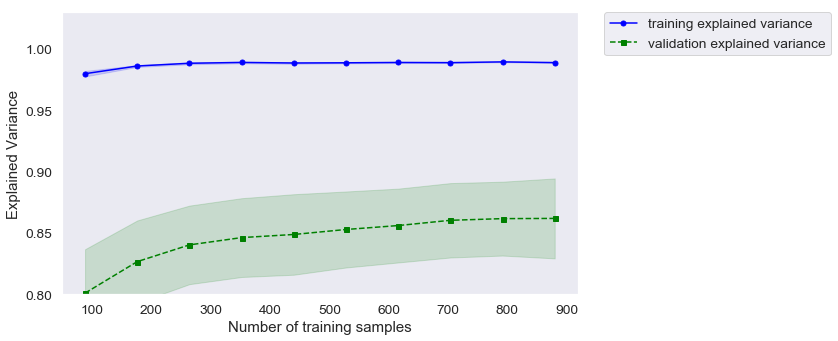

In [252]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=rf_optimized,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,scoring = 'explained_variance',
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,5))
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training explained variance')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation explained variance')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Explained Variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

### 5. AdaBoost Regressor 

In [238]:
from sklearn.ensemble import AdaBoostRegressor

In [239]:
adaboost = AdaBoostRegressor(dtr_optimized)

In [240]:
adaboost.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [242]:
adaboost_pred = adaboost.predict(X_test)

In [243]:
MAE_adaboost = mean_absolute_error(y_test, adaboost_pred)
MSE_adaboost = mean_squared_error(y_test, adaboost_pred)
var_adaboost = explained_variance_score(y_test, adaboost_pred)

In [244]:
print("MAE :" + str(MAE_adaboost))
print("MSE :" + str(MSE_adaboost))
print("Explained variance :" + str(var_adaboost))

MAE :0.1189010872513603
MSE :0.026560641172464573
Explained variance :0.8396041043678539


In [248]:
# Optimize
parameters = {
'learning_rate':[0.01,0.03,0.05,0.1],
'n_estimators':[50, 100,200,500,1000],
'loss':['linear', 'square', 'exponential']
}

In [249]:
grid_adaboost = GridSearchCV(adaboost, parameters, cv=10, verbose=1, scoring = 'explained_variance')
grid_adaboost.fit(X_train, y_train)

print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 12.5min finished


0.8693732241141093
{'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 1000}


In [254]:
adaboost_optimized = AdaBoostRegressor(base_estimator=dtr_optimized,n_estimators=1000,learning_rate=0.03)

In [255]:
adaboost_optimized .fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.03, loss='linear', n_estimators=1000,
         random_state=None)

In [256]:
adaboost_opt_pred = adaboost_optimized.predict(X_test)

In [257]:
MAE_adaboost = mean_absolute_error(y_test, adaboost_opt_pred)
MSE_adaboost = mean_squared_error(y_test, adaboost_opt_pred)
var_adaboost = explained_variance_score(y_test, adaboost_opt_pred)

In [258]:
print("MAE :" + str(MAE_adaboost))
print("MSE :" + str(MSE_adaboost))
print("Explained variance :" + str(var_adaboost))

MAE :0.1177286596850657
MSE :0.026544698731481676
Explained variance :0.8394104228223043


In [259]:
# Learning curve of AdaBoost Regressor

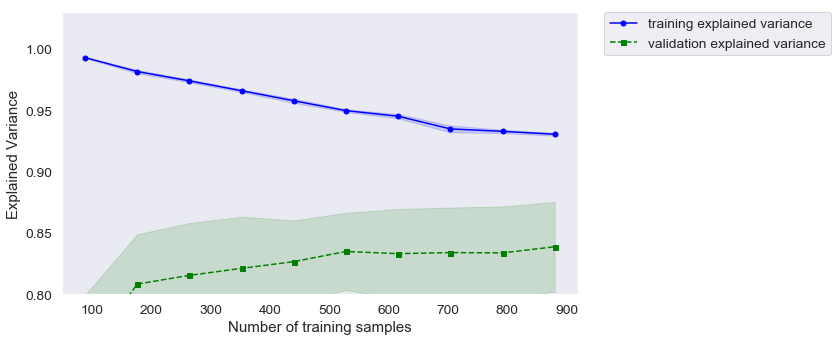

In [260]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=adaboost_optimized,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,scoring = 'explained_variance',
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,5))
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training explained variance')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation explained variance')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Explained Variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

### 6. XGBoost 

In [124]:
import xgboost

In [141]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [142]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [143]:
predictions_xgb = xgb.predict(X_test)
print(explained_variance_score(predictions_xgb,y_test))

0.840004866395449


In [ ]:
# optimize XGBoost with GridsearchCV

In [192]:
parameters = {
 'max_depth':[2, 4, 6, 8],
'learning_rate':[0.01,0.03,0.05],
'n_estimators':[50, 100, 200,1000]
}

In [193]:
grid_xgb = GridSearchCV(xgboost.XGBRegressor(), parameters, cv=10, verbose=1, scoring = 'explained_variance')
grid_xgb.fit(X_train, y_train)

print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  4.6min finished


0.8693732241141093
{'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 1000}


In [196]:
xgb_optimized = xgboost.XGBRegressor(max_depth=2,learning_rate=0.03,n_estimators=1000)

In [198]:
xgb_optimized.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [199]:
xgb_pred = xgb_optimized.predict(X_test)

In [201]:
MAE_xgb = mean_absolute_error(y_test, xgb_pred)
MSE_xgb = mean_squared_error(y_test, xgb_pred)
var_xgb = explained_variance_score(y_test, xgb_pred)

In [202]:
print("MAE :" + str(MAE_xgb))
print("MSE :" + str(MSE_xgb))
print("Explained variance :" + str(var_xgb))

MAE :0.10421348631372301
MSE :0.021491396445076836
Explained variance :0.8693436783579712


### Learning curve XGBoost

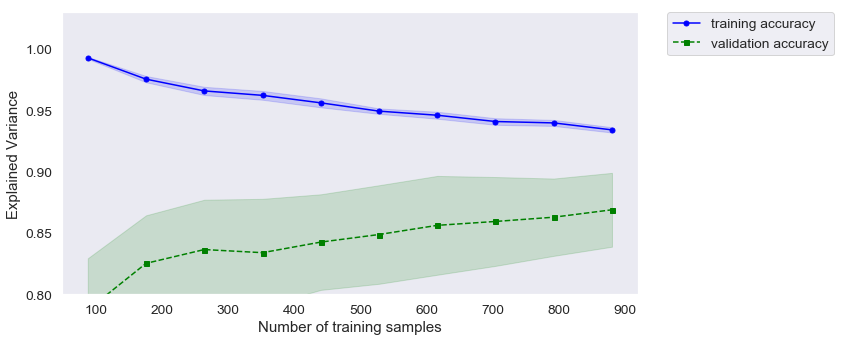

In [229]:
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=xgb_optimized,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,scoring = 'explained_variance',
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,5))
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training explained variance')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation explained variance')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Explained Variance')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('images/06_05.png', dpi=300)
plt.show()

# Evaluate different models

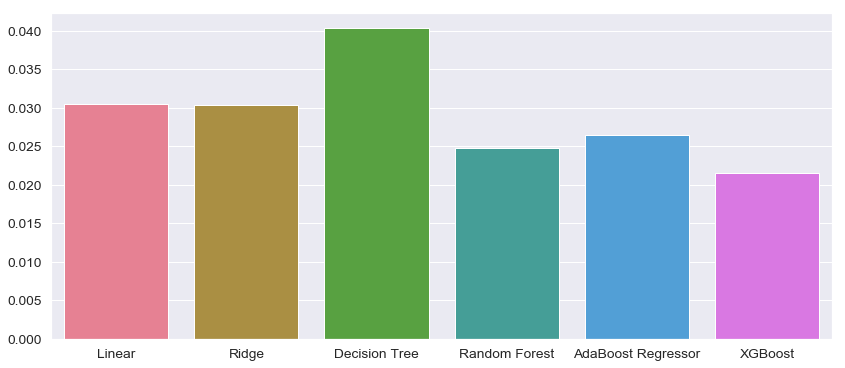

In [265]:
# Comparison of MSE of the models
MSEs = [MSE_lr,MSE_ridge,MSE_dtr,MSE_rf,MSE_adaboost,MSE_xgb]
models = ['Linear','Ridge','Decision Tree','Random Forest','AdaBoost Regressor','XGBoost']
plt.figure(figsize=(14,6))
sns.barplot(models,MSEs,palette='husl')

(0.7, 1)

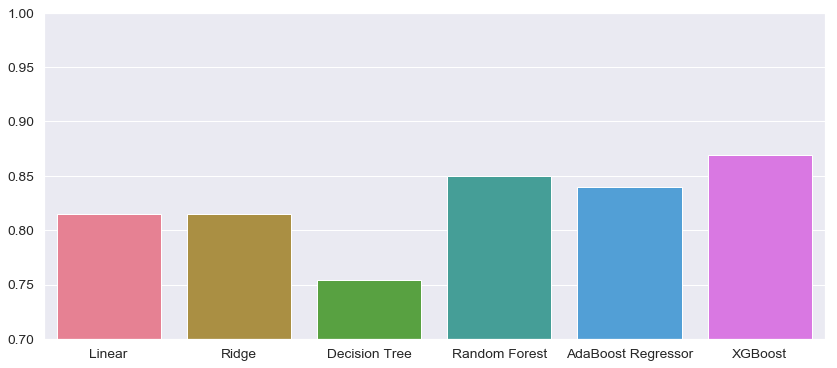

In [266]:
# Comparison of explained variance of the models
Vars = [var_lr,var_ridge,var_dtr,var_rf,var_adaboost,var_xgb]
models = ['Linear','Ridge','Decision Tree','Random Forest','AdaBoost Regressor','XGBoost']
plt.figure(figsize=(14,6))
sns.barplot(models,Vars,palette='husl')
plt.ylim(0.7, 1)

## Make single prediction and convert to real value 

In [218]:
# single prediction
example = df_final.iloc[0]
example = pd.DataFrame(example)
example = example.T
example.drop('SalePrice_Log',axis=1,inplace=True)

In [221]:
# prediction based on XGBoost model
prediction_example = xgb_optimized.predict(example)

In [222]:
prediction_example

array([12.199044], dtype=float32)

In [223]:
# convert back to normal scale
np.expm1(prediction_example)

array([198598.25], dtype=float32)